In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import gray2rgb, rgb2gray # sklearn-image
from skimage.util import montage # 일렬로 배열된 이미지를 커다란 사각형으로 재배열.
from sklearn.datasets import fetch_olivetti_faces

In [2]:
faces=fetch_olivetti_faces()

print(np.array(faces.images).shape) # 400개의 64x64 이미지이다.

(400, 64, 64)


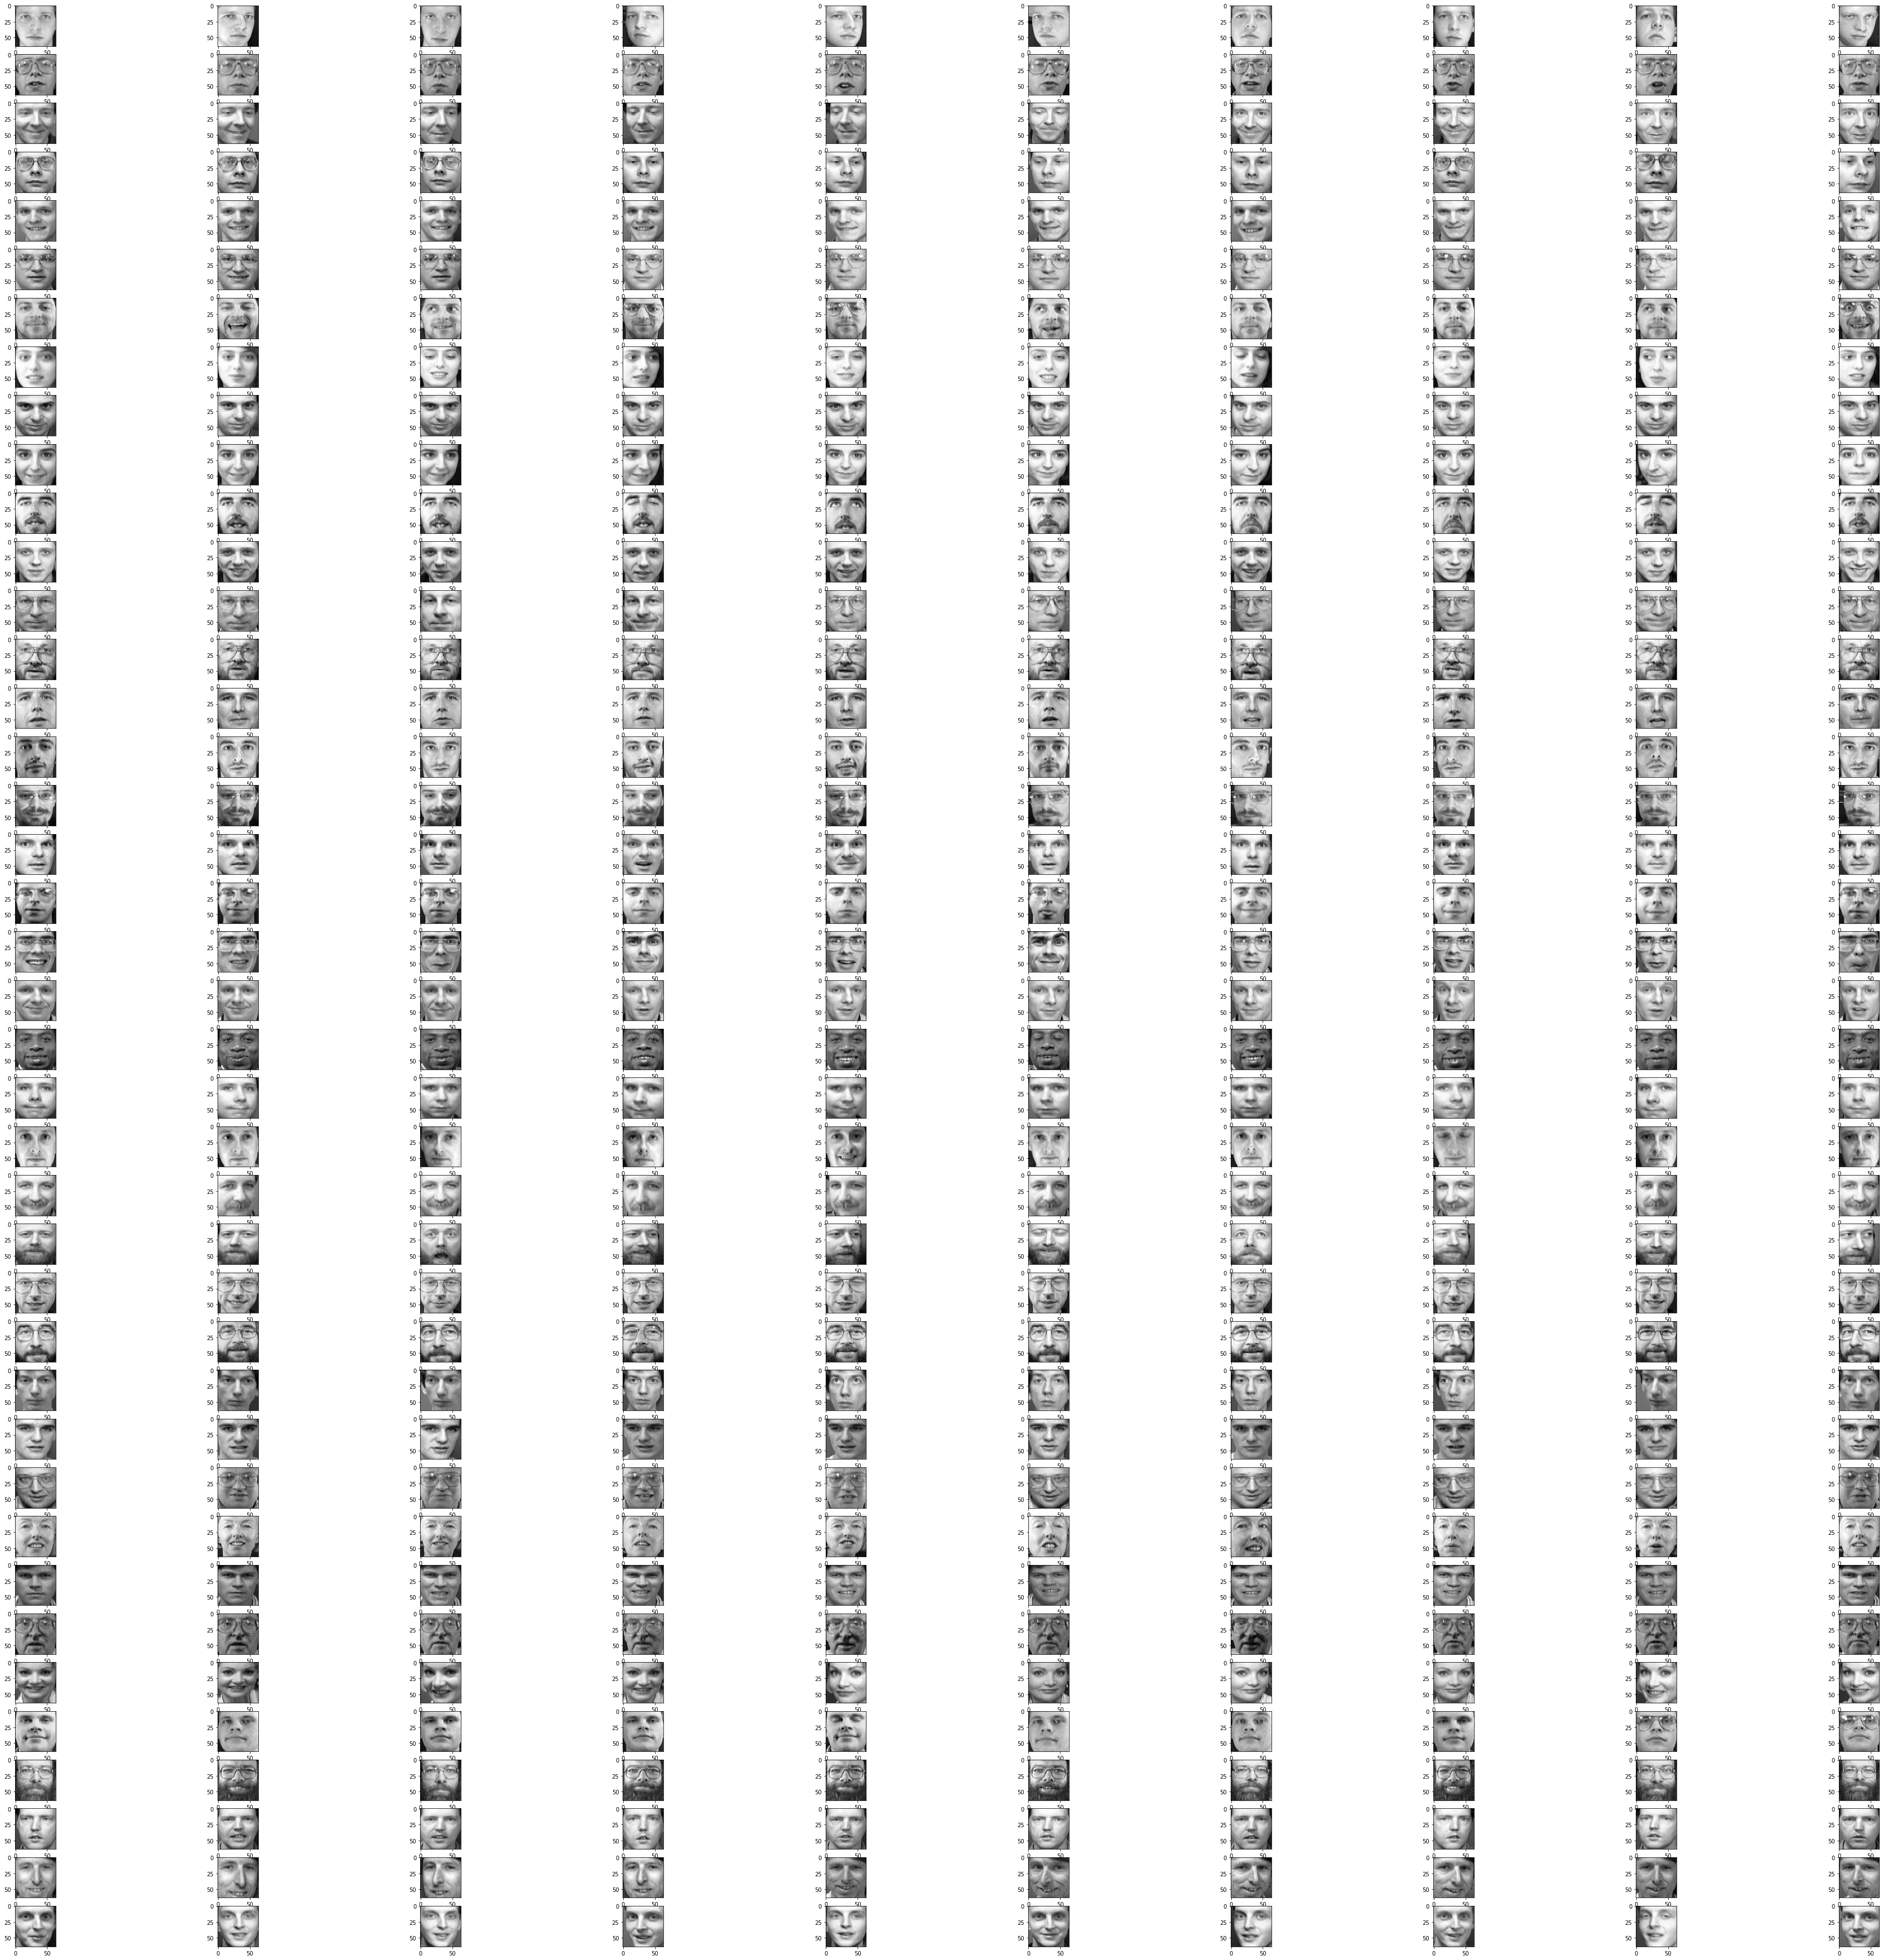

In [3]:
fig, axes = plt.subplots(40,10, figsize=(64,64))
for i,ax in enumerate(axes.flat):
    ax.imshow(faces['images'][i],'gray')

In [4]:
X_vec=np.stack([gray2rgb(iimg) for iimg in faces.images], 0) # 이미지를 컬러로 변환해 아래로 쌓는다.
y_vec=faces.target#.astype(np.uint8)

print('shape of X: ', X_vec.shape,'\n'+'shape of y: ', y_vec.shape)

shape of X:  (400, 64, 64, 3) 
shape of y:  (400,)


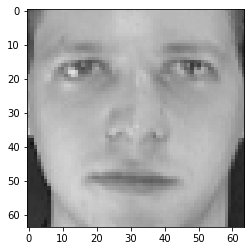

In [5]:
plt.imshow(X_vec[0])

In [6]:
from sklearn.model_selection import train_test_split
import keras
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test=train_test_split(X_vec,
                                                 y_vec,
                                                 train_size=0.8)
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
y_train_num=np.argmax(y_train, axis=1)
y_test_num=np.argmax(y_test, axis=1)

In [7]:
from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.layers import Conv2D
from keras.layers import Activation, Dropout, Flatten, Dense

num_classes=40

# 모델 구조 정의 
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=[64,64,3], padding='same')) #64,64,3
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 전결합층
model.add(Flatten())    # 벡터형태로 reshape
model.add(Dense(512))   # 출력
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes)) # 40개
model.add(Activation('softmax'))

# 모델 구축하기
model.compile(loss='categorical_crossentropy',   # 최적화 함수 지정
    optimizer='rmsprop',
    metrics=['accuracy'])
# 모델 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 activation (Activation)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 32, 32, 64)        0         
                                                        

In [8]:
X_test[0].shape

(64, 64, 3)

In [33]:
X_train.shape

(320, 64, 64, 3)

In [10]:
model.predict(X_train[0].reshape(1,64,64,3))

array([[0.0260756 , 0.02099302, 0.01917558, 0.02523711, 0.02519639,
        0.02470804, 0.02128428, 0.02101054, 0.02269636, 0.02393862,
        0.02925389, 0.02412516, 0.03061448, 0.02529525, 0.02607458,
        0.02288966, 0.02420755, 0.02671085, 0.02671941, 0.01815682,
        0.02700066, 0.02961847, 0.02027541, 0.02444957, 0.02821755,
        0.02831412, 0.02217459, 0.02370649, 0.02455279, 0.02719584,
        0.02701446, 0.03056203, 0.02361514, 0.02277156, 0.02964886,
        0.02356238, 0.03355026, 0.02465468, 0.01787205, 0.0268799 ]],
      dtype=float32)

In [11]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)
es = EarlyStopping(monitor='val_accuracy', verbose=1, patience=50)
model.fit(X_train, y_train, epochs=50,validation_split=0.2,callbacks=[es,mc])

# 모델 평가하기 
score = model.evaluate(X_test, y_test)
print('accuracy=', score[1])    # acc

Epoch 1/50
8/8 [==============================] - 2s 240ms/step - loss: 4.8731 - accuracy: 0.0352 - val_loss: 3.7244 - val_accuracy: 0.0156
Epoch 2/50
8/8 [==============================] - 2s 203ms/step - loss: 3.7105 - accuracy: 0.0273 - val_loss: 3.7320 - val_accuracy: 0.0156
Epoch 3/50
8/8 [==============================] - 2s 223ms/step - loss: 3.6611 - accuracy: 0.0703 - val_loss: 3.6966 - val_accuracy: 0.0312
Epoch 4/50
8/8 [==============================] - 2s 207ms/step - loss: 3.6673 - accuracy: 0.0469 - val_loss: 3.7398 - val_accuracy: 0.0312
Epoch 5/50
8/8 [==============================] - 2s 218ms/step - loss: 3.5604 - accuracy: 0.0859 - val_loss: 3.5437 - val_accuracy: 0.0938
Epoch 6/50
8/8 [==============================] - 2s 200ms/step - loss: 3.3846 - accuracy: 0.1797 - val_loss: 4.3143 - val_accuracy: 0.0469
Epoch 7/50
8/8 [==============================] - 2s 226ms/step - loss: 3.1068 - accuracy: 0.2695 - val_loss: 2.5293 - val_accuracy: 0.4375
Epoch 8/50
8/8 [====

In [13]:
from lime import lime_image # 이미지 모듈
from lime.wrappers.scikit_image import SegmentationAlgorithm # LIME이 사용할 수 있게. 

explainer=lime_image.LimeImageExplainer()

In [14]:
segmenter=SegmentationAlgorithm('slic', 
                               n_segments=100, #이미지 분할 조각 개수
                               compactness=1, # 유사한 파트를 합치는 함수, log scale, default : 10
                               sigma=1) # 스무딩 역할, 0과 1 사이의 float

In [32]:
X_test[0].shape

(64, 64, 3)

In [34]:
X_test[olivetti_test_index].shape

(64, 64, 3)

In [16]:
model.predict

<bound method Model.predict of <keras.engine.sequential.Sequential object at 0x000001F8971C4B80>>

In [17]:
olivetti_test_index=0

exp=explainer.explain_instance(X_test[olivetti_test_index], #데이터하나
                              classifier_fn=model.predict,# 40 class의 확률 반환 (softmax)
                              top_labels=5, # 확률 기준 1-5위 분석
                               num_samples=1000,# 샘플링 공간
                              segmentation_fn=segmenter) # 이전에 lime의 형식에 맞게 래핑된 분할 알고리즘

  0%|          | 0/1000 [00:00<?, ?it/s]

In [38]:
type(exp)

lime.lime_image.ImageExplanation

In [18]:
X_test[0].shape

(64, 64, 3)

Text(0.5, 1.0, 'Show mask only')

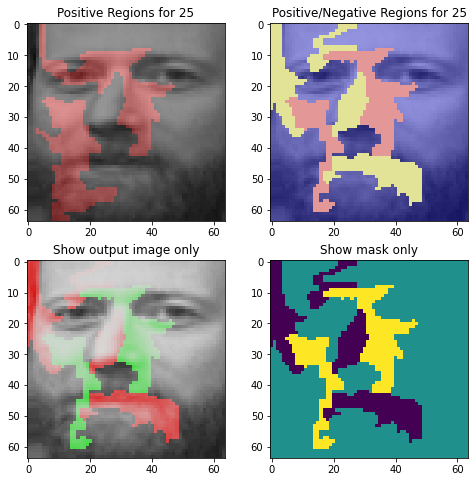

In [19]:
from skimage.color import label2rgb # 

# 캔버스
fig, ((ax1, ax2), (ax3, ax4))=plt.subplots(2,2,figsize=(8,8))
ax=[ax1,ax2,ax3,ax4]
for i in ax:
    i.grid(False)
# 예측에 가장 도움되는 세그먼트만 출력
temp, mask=exp.get_image_and_mask(y_test_num[0],
                                 positive_only=True, # 설명 모델이 결과값을 가장 잘 설명하는 이미지 영역만 출력
                                 num_features=8, # 분할 영역의 크기
                                 hide_rest=False) # 이미지를 분류하는 데 도움이 되는 서브모듈 외의 모듈도 출력
# label2rgb : 형광색 마스킹
ax1.imshow(label2rgb(mask, temp, bg_label=0), interpolation='nearest')
ax1.set_title('Positive Regions for {}'.format(y_test_num[0]))

# 모든 세그먼트 출력
temp, mask=exp.get_image_and_mask(y_test_num[0],
                                 positive_only=False, # 설명 모델이 결과값을 가장 잘 설명하는 이미지 영역만 출력X
                                 num_features=8, # 분할 영역의 크기
                                 hide_rest=False) # 이미지를 분류하는 데 도움이 되는 서브모듈 외의 모듈도 출력

ax2.imshow(label2rgb(4-mask, temp, bg_label=0), interpolation='nearest') # 역변환
ax2.set_title('Positive/Negative Regions for {}'.format(y_test_num[0]))

# 이미지만 출력
ax3.imshow(temp, interpolation='nearest')
ax3.set_title('Show output image only')

# 마스크만 출력
ax4.imshow(mask, interpolation='nearest') # 정수형 array.
ax4.set_title('Show mask only') # 정수형

In [20]:
from sklearn.metrics import classification_report
y_pred=model.predict(X_test)
y_pred_num=np.argmax(y_pred, axis=1)
print(classification_report(y_true=y_test_num, y_pred=y_pred_num))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           7       0.00      0.00      0.00         0
           8       1.00      1.00      1.00         4
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         2
          11       0.40      1.00      0.57         2
          12       1.00      0.75      0.86         4
          13       1.00      1.00      1.00         2
          14       0.33      1.00      0.50         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       1.00      0.50      0.67         2
          18       1.00    

C:\Users\vislab\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vislab\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vislab\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
np.where(y_test_num==2)

(array([13, 64, 66], dtype=int64),)

  0%|          | 0/1000 [00:00<?, ?it/s]

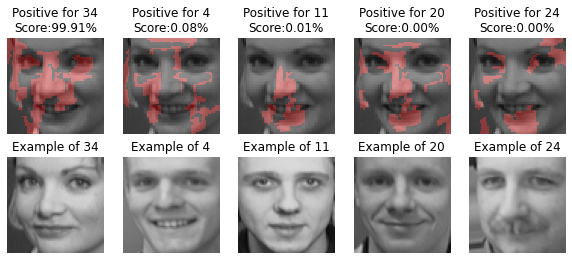

In [22]:
%matplotlib inline
## 조금 더 자세히 출력하자. (기존의 )
test_idx=3
exp=explainer.explain_instance(X_test[test_idx], #데이터하나
                              classifier_fn=model.predict,# 40 class의 확률 반환 (softmax)
                              top_labels=5, # 확률 기준 1-5위 분석
                               num_samples=1000,# 샘플링 공간
                              segmentation_fn=segmenter) # 이전에 lime의 형식에 맞게 래핑된 분할 알고리즘

fig,m_axs=plt.subplots(2,5, figsize=(10,4))

for i, (c_ax, gt_ax) in zip(exp.top_labels, m_axs.T):
    temp, mask=exp.get_image_and_mask(i,
                                         positive_only=True, # 설명 모델이 결과값을 가장 잘 설명하는 이미지 영역만 출력
                                         num_features=12, # 분할 영역의 크기
                                         hide_rest=False, # 이미지를 분류하는 데 도움이 되지 않는 세그먼트는 출력 x
                                         min_weight=0.001) 
    c_ax.imshow(label2rgb(mask, temp, bg_label=0),
               interpolation='nearest')
    c_ax.set_title('Positive for {}\nScore:{:2.2f}%'.format(i,
                                                           100*y_pred[test_idx, i]))
    c_ax.axis('off')
    
    face_id=np.random.choice(np.where(y_train_num==i)[0])
    
    gt_ax.imshow(X_train[face_id])
    gt_ax.set_title('Example of {}'.format(i))
    gt_ax.axis('off')